## What is Bank Customer Churn?

Bank customer churn refers to the phenomenon where customers stop using the services of a bank and switch to another bank or stop using banking services altogether. It is a measure of customer attrition or loss. When customers leave a bank, it can be costly for the bank in terms of lost revenue and the need to acquire new customers to replace them.

Churn can happen due to various reasons. Some common reasons include dissatisfaction with the bank's services, finding better offers or deals from competitors, relocation, or changes in financial needs. Churn analysis aims to identify patterns or factors that contribute to customer churn so that banks can take proactive measures to retain customers and improve their services.

By analyzing customer churn, banks can gain insights into the factors that lead to customer attrition. They can then develop strategies to improve customer satisfaction, enhance customer loyalty, and provide targeted offers or incentives to retain existing customers. Churn analysis can help banks identify early warning signs and take preventive actions to minimize customer churn and maintain a strong customer base.

## Problem Statement: Bank Customer Churn Prediction

Problem: A bank wants to predict which of its customers are at risk of churning, i.e., leaving the bank, in order to take proactive measures to retain those customers. The bank has collected historical data on customer behavior, demographics, and banking transactions. The objective is to build a predictive model that can accurately identify customers who are likely to churn based on their characteristics and behavior.

## Dataset:

The dataset contains information about bank customers, including their demographic details (age, gender, marital status), account information (account balance, number of products), transaction history (number of transactions, transaction amounts), and customer interaction data (customer support calls, online activity).
The dataset also includes a target variable indicating whether each customer has churned or not (1 for churned, 0 for not churned).
Task:
The task is to develop a churn prediction model using the available dataset. Given a new customer's information, the model should predict whether the customer is likely to churn or not.

## Approach:

Data Preprocessing: Clean the dataset, handle missing values, and perform feature engineering if necessary. This may involve transforming categorical variables, normalizing numeric variables, and creating new features.

Feature Selection: Identify the most relevant features that have a significant impact on churn prediction. This can be done using statistical methods, domain knowledge, or feature importance techniques.

Model Selection: Choose an appropriate machine learning algorithm for churn prediction, such as logistic regression, decision trees, random forests, or gradient boosting. Consider the trade-off between model accuracy, interpretability, and computational complexity.

Model Training: Split the dataset into training and testing sets. Train the selected model on the training set and tune its hyperparameters to optimize performance. Use evaluation metrics like accuracy, precision, recall, and F1 score to assess the model's performance.

Model Evaluation: Evaluate the trained model on the testing set to assess its generalization ability. Compare the performance of different models and select the one with the best results.

Predictions: Apply the chosen model to predict churn for new, unseen customer data. Monitor model performance over time and periodically retrain the model using updated data to maintain its accuracy and effectiveness.

The ultimate goal is to develop a churn prediction model that can effectively identify customers at risk of churning, allowing the bank to take proactive actions, such as targeted marketing campaigns, personalized offers, or improved customer service, to retain those customers and minimize churn.


## used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA and Feature engeneering

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# check shape of data
data.shape

(10000, 12)

In [6]:
# Get the information of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
# drop id column because we have no use of it 
data.drop("customer_id",axis=1,inplace=True)

In [8]:
# now we have to check the nulvaues in data 
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
# check with duplicet values to
data.duplicated().sum()

0

In [10]:
# saprate numerical colum and catiogerical columns
catigorical_features = data.select_dtypes(include= "object").columns
numerical_features = data.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index(['country', 'gender'], dtype='object')
Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')


In [11]:
# check all unique values in catigorical_features
for i in catigorical_features:
    print(i,data[i].unique())

country ['France' 'Spain' 'Germany']
gender ['Female' 'Male']


In [12]:
# check all unique values in catigorical_features
for i in catigorical_features:
    print(i,data[i].value_counts())

country country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
gender gender
Male      5457
Female    4543
Name: count, dtype: int64


In [13]:
# statical Analysis With 5 number summery
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


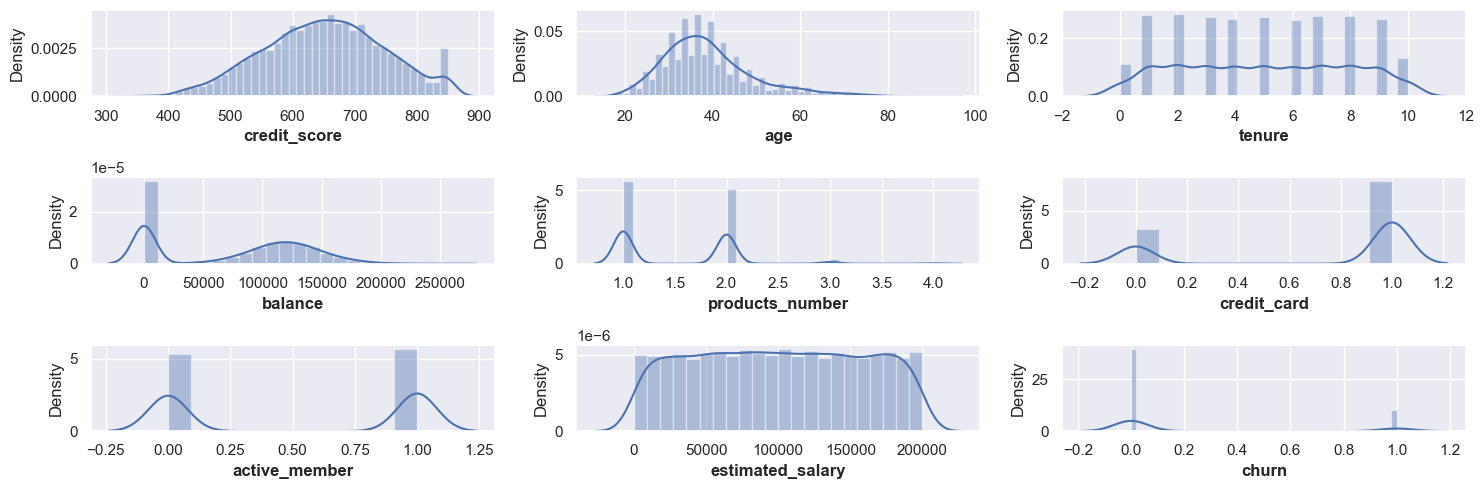

In [14]:
# check the distribution of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:9]):
        plt.subplot(60,3,i+1)
        sns.distplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

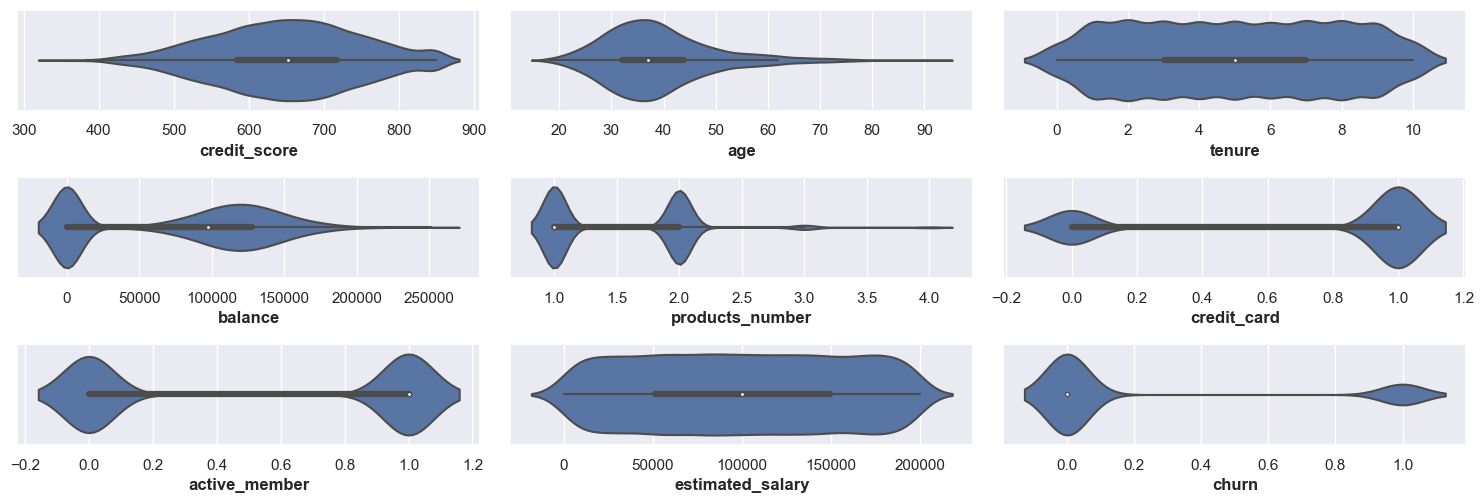

In [15]:
# check the frequency  of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:9]):
        plt.subplot(60,3,i+1)
        sns.violinplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

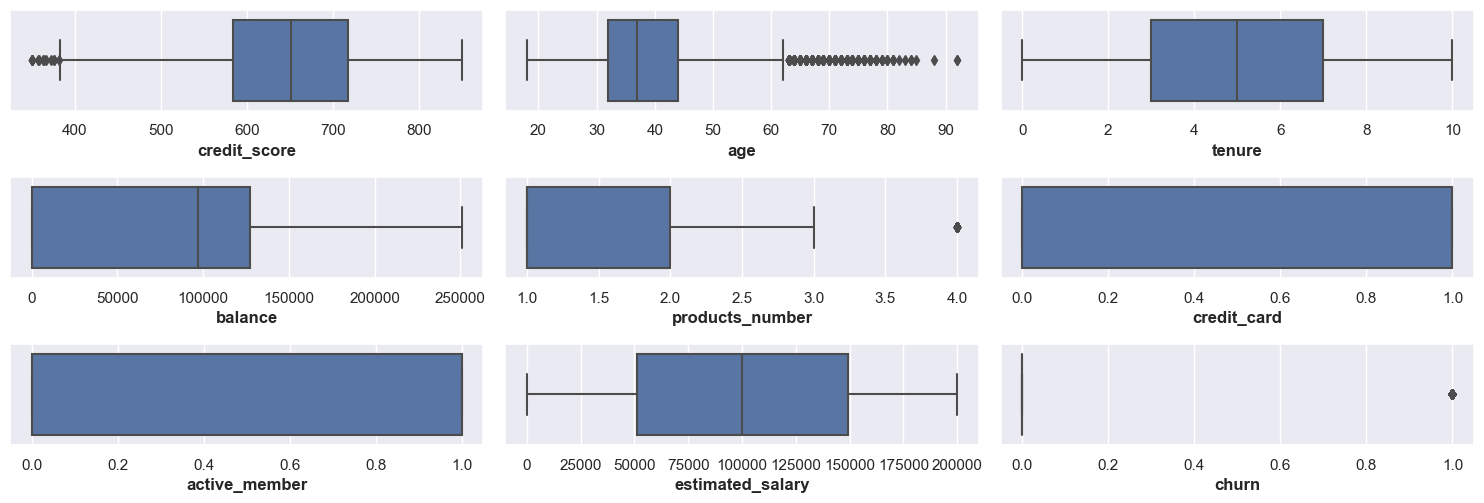

In [16]:
# check the boxplot  of numerical data

try:
    plt.figure(figsize=(15, 100))
    for i,col in enumerate(numerical_features[0:9]):
        plt.subplot(60,3,i+1)
        sns.boxplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

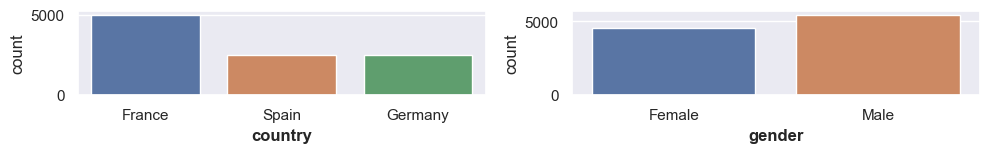

In [17]:
# create the count plot of catogotical data
try:
    plt.figure(figsize=(15, 90))
    for i,col in enumerate(catigorical_features[0:2]):
        plt.subplot(60,3,i+1)
        sns.countplot(x=data[col])
        plt.xlabel(col, weight='bold')
        plt.tight_layout()
except Exception as e:
    print(e)  

<Axes: xlabel='gender'>

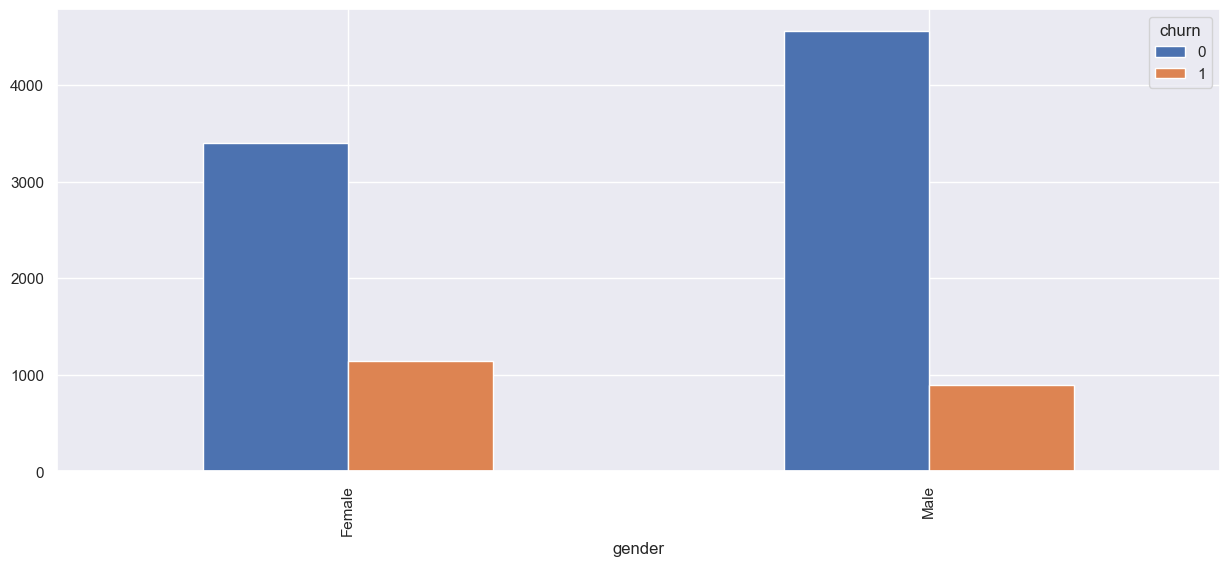

In [18]:
# check the relation of chure and gender
gender = pd.crosstab(data["gender"],data["churn"])
gender.plot(kind="bar")

<Axes: xlabel='country'>

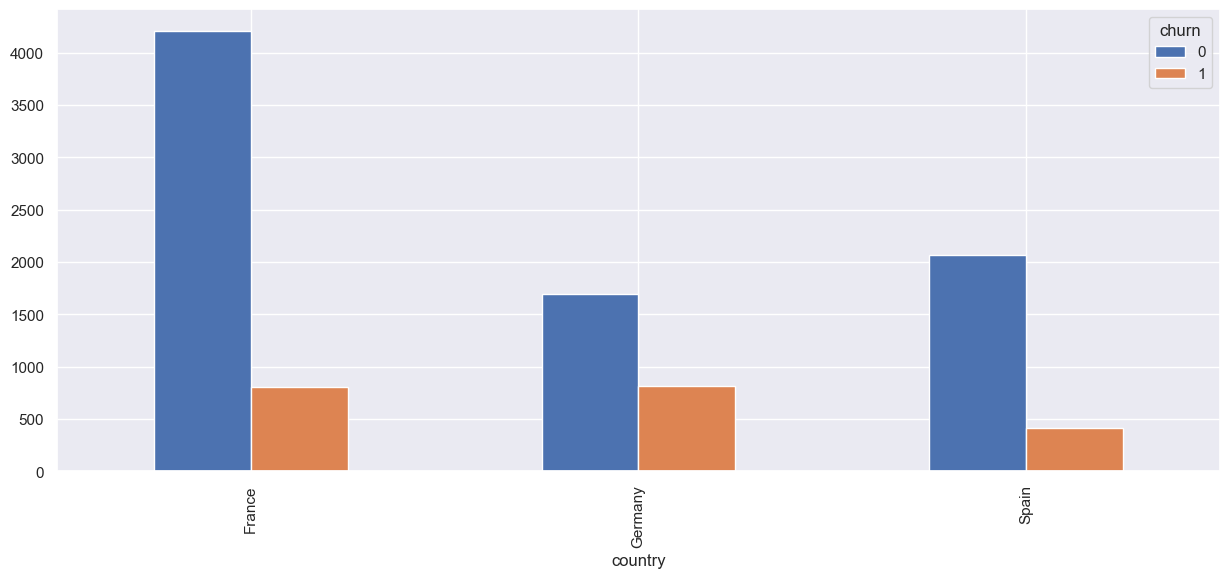

In [19]:
# check the relation of chure and country
country = pd.crosstab(data["country"],data["churn"])
country.plot(kind="bar")

In [20]:
credit_score = data[(data["credit_score"] > 750) & (data["churn"] == 1)]
# people thos credit score is greater then 750 and left the bank
credit_score

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
43,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
46,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
81,777,France,Female,32,2,0.00,1,1,0,136458.19,1
143,793,Spain,Male,52,2,0.00,1,1,0,159123.82,1
179,754,Germany,Female,55,3,161608.81,1,1,0,8080.85,1
...,...,...,...,...,...,...,...,...,...,...,...
9863,757,Germany,Female,43,5,131433.33,2,1,1,3497.43,1
9882,771,France,Male,50,3,105229.72,1,1,1,16281.68,1
9884,751,France,Female,48,4,0.00,1,0,1,30165.06,1
9960,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1


In [21]:
# check with thor people whos age is grater then 60 and left the bank
data[(data["age"] > 60) &  (data["churn"] == 1)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
243,659,Germany,Male,67,6,117411.60,1,1,1,45071.09,1
276,756,France,Male,62,3,0.00,1,1,1,11199.04,1
399,616,France,Female,66,1,135842.41,1,1,0,183840.51,1
...,...,...,...,...,...,...,...,...,...,...,...
9646,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9718,710,Spain,Male,62,3,131078.42,2,1,0,119348.76,1
9747,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1


In [22]:
# check with thor people whos age is grater then 50 and left the bank
data[(data["age"] < 60) & (data["churn"] == 0)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


<Axes: xlabel='tenure'>

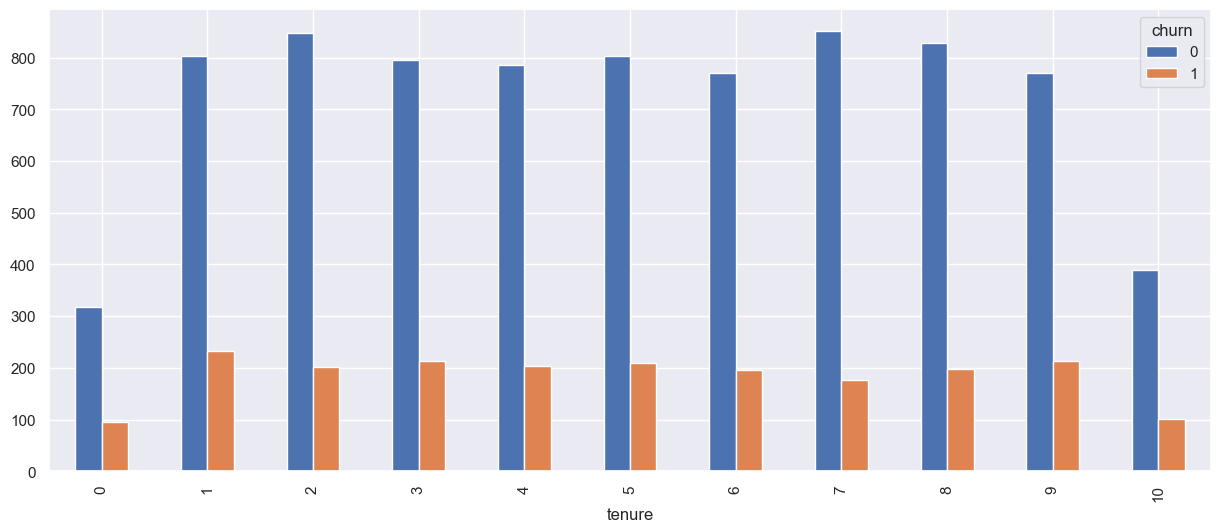

In [23]:
# check the relation of chure and tenure
tenure = pd.crosstab(data["tenure"],data["churn"])
tenure.plot(kind="bar")

<Axes: xlabel='products_number'>

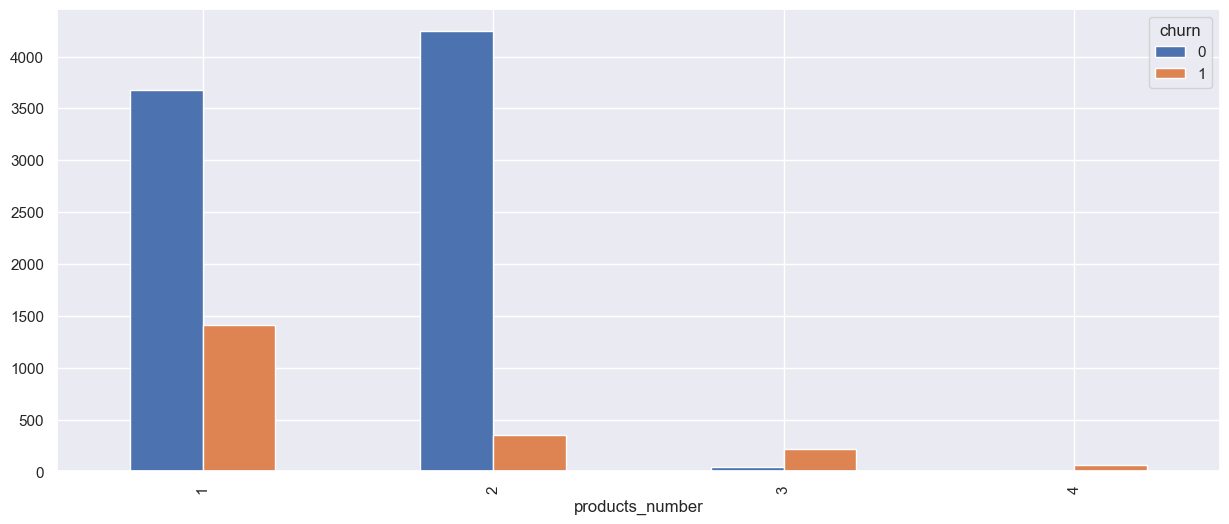

In [24]:
# check the relation of chure and tenure
products_number = pd.crosstab(data["products_number"],data["churn"])
products_number.plot(kind="bar")

<Axes: xlabel='credit_card'>

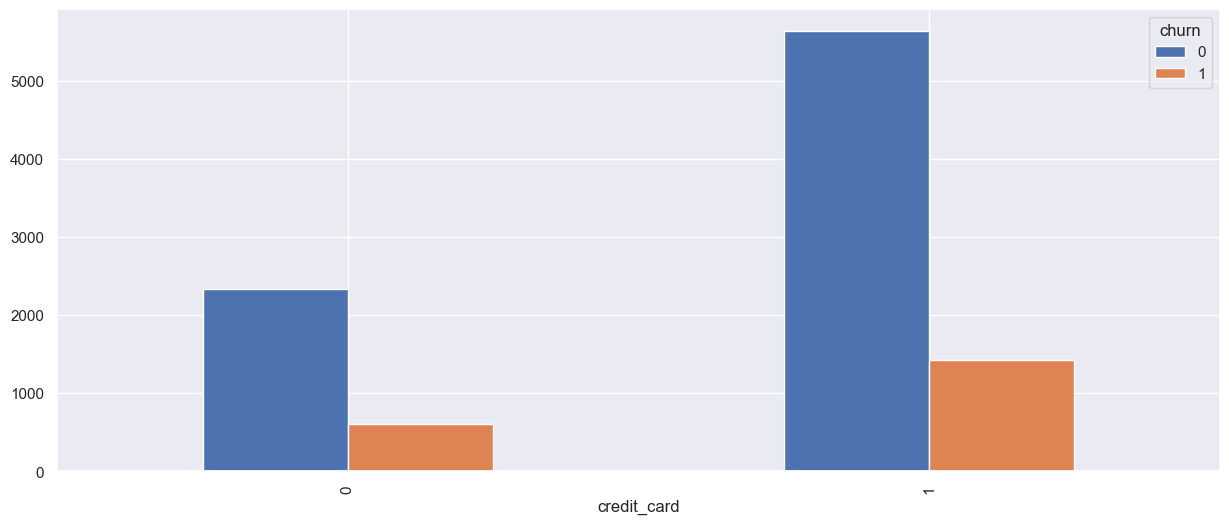

In [25]:
# check the relation of chure and tenure
credit_card = pd.crosstab(data["credit_card"],data["churn"])
credit_card.plot(kind="bar")

<Axes: xlabel='active_member'>

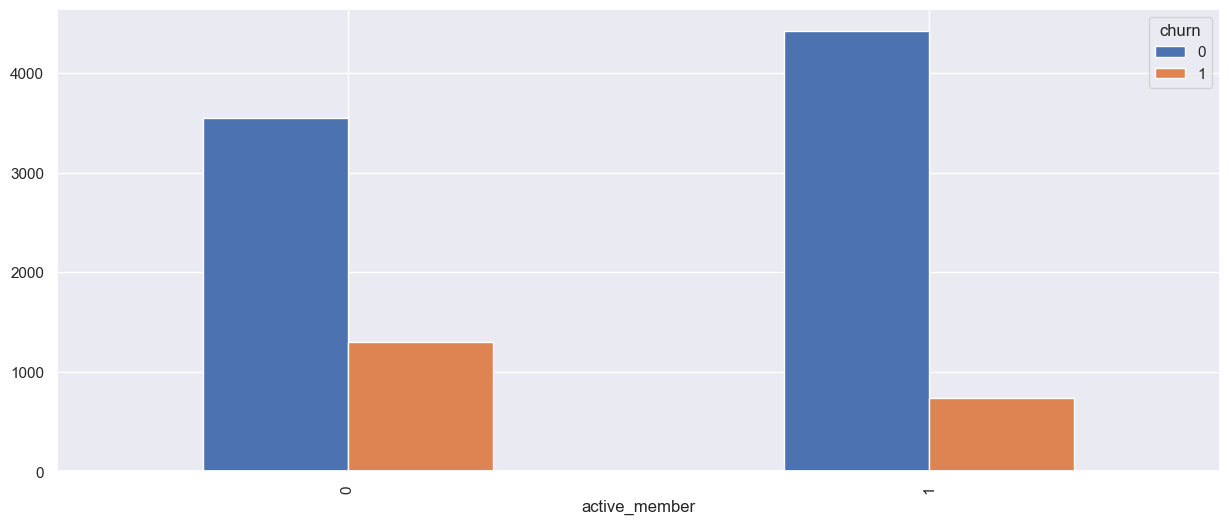

In [26]:
# check the relation of chure and active_member
active_member = pd.crosstab(data["active_member"],data["churn"])
active_member.plot(kind="bar")

This is imbalance data it can hearm our model we have to balance this data now


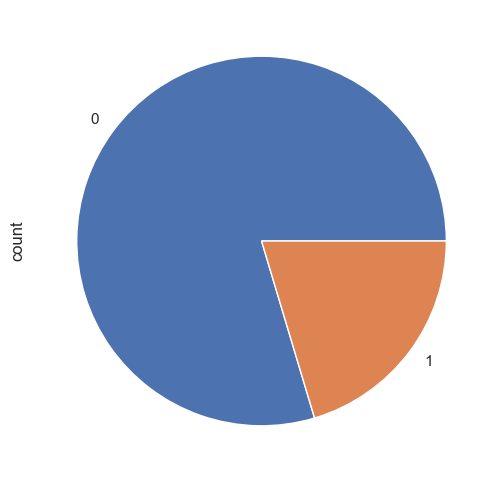

In [27]:
data["churn"].value_counts().plot.pie()
print("This is imbalance data it can hearm our model we have to balance this data now")

In [28]:
# convert gender in to binary values
data["gender"] = data["gender"].map({"Female":0,"Male":1})

In [29]:
# drop country colum as we dont need that column
data.drop("country",axis=1,inplace=True)

<Axes: >

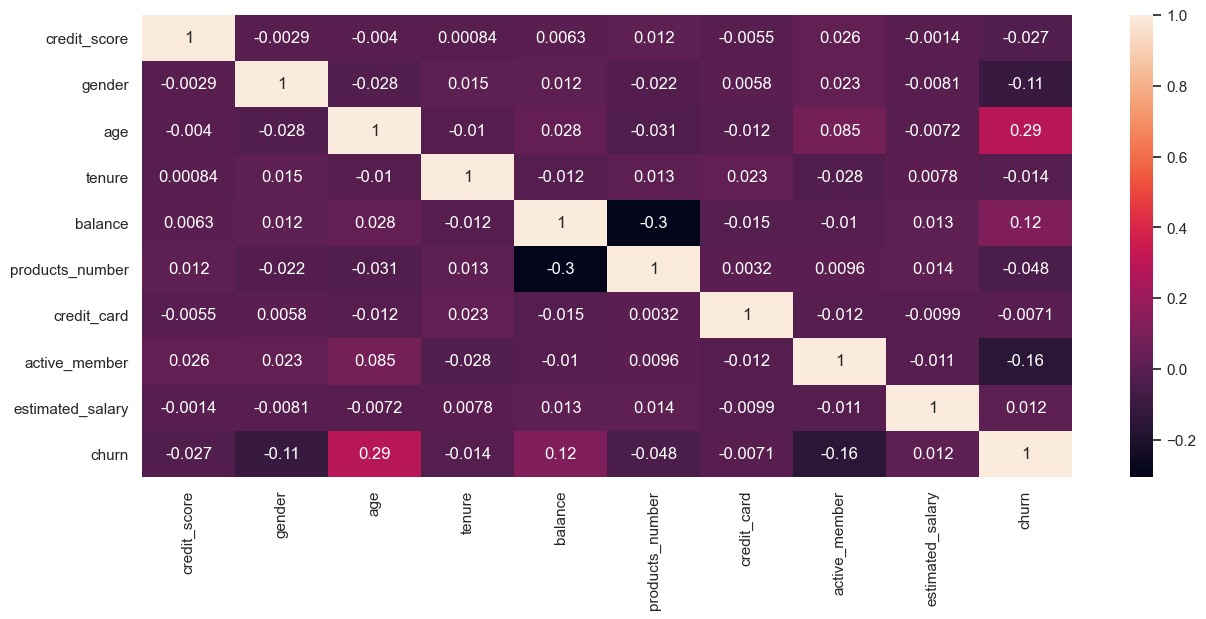

In [30]:
sns.heatmap(data.corr(),annot=True)

## Model Bulding

In [31]:
data

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [32]:
# saprate dependent and indipendent columns
x = data.drop("churn",axis=1)
y = data["churn"]

In [33]:
# saprate numerical colum and catiogerical columns
catigorical_features = x.select_dtypes(include= "object").columns
numerical_features = x.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [35]:
# Create numeric pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

preprocessour = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [36]:
from imblearn.combine import SMOTETomek
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(x, y)

In [37]:
print(X_res.shape)
print(y_res.shape)

(13680, 9)
(13680,)


In [38]:
# now we are ready to train our model we balance our data
y_res.value_counts()

churn
0    6840
1    6840
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10944, 9)
(2736, 9)
(10944,)
(2736,)


In [41]:
# apply preprocessor object here
X_train = preprocessour.fit_transform(X_train)
X_test = preprocessour.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,StackingClassifier,VotingClassifier
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [43]:
## Logastic regression
logastic = LogisticRegression()
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10,10.1],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [44]:
randomsearch =RandomizedSearchCV(logastic,params,cv=5)

In [45]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 10.1],
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

In [46]:
randomsearch.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 10}

In [47]:
randomsearch.score(X_train,y_train)

0.7726608187134503

In [48]:
y_predict = randomsearch.predict(X_test)

In [49]:
accuracy_score(y_test,y_predict)

0.7679093567251462

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1388
           1       0.75      0.79      0.77      1348

    accuracy                           0.77      2736
   macro avg       0.77      0.77      0.77      2736
weighted avg       0.77      0.77      0.77      2736



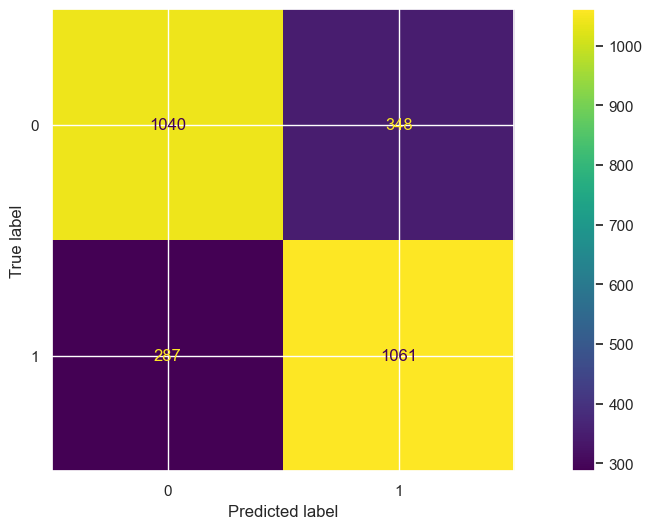

In [51]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [52]:
# Gaussian Nive Biyers
nive = GaussianNB()
params = {'var_smoothing': [ 1e-8, 1e-7, 1e-6, 1e-5]}

In [53]:
randomsearch =RandomizedSearchCV(nive,params,cv=5)

In [54]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1e-08, 1e-07, 1e-06,
                                                          1e-05]})

In [55]:
randomsearch.best_params_

{'var_smoothing': 1e-08}

In [56]:
randomsearch.score(X_train,y_train)

0.7954130116959064

In [57]:
y_predict = randomsearch.predict(X_test)

In [58]:
accuracy_score(y_test,y_predict)

0.7847222222222222

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1388
           1       0.77      0.80      0.78      1348

    accuracy                           0.78      2736
   macro avg       0.78      0.78      0.78      2736
weighted avg       0.79      0.78      0.78      2736



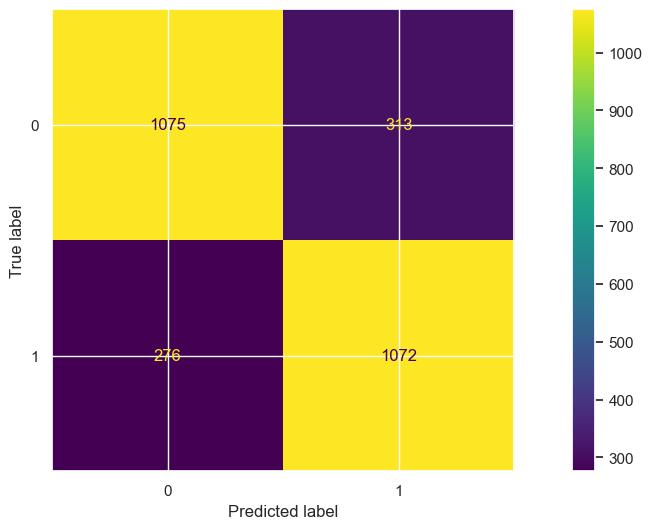

In [60]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [61]:
#Randomforest
forest = RandomForestClassifier()
params = {
    "n_estimators":[150,200,250],
    "criterion":["gini","entropy"],
    'max_depth': [8,10,15],
    'min_samples_split':[3,4,6],
    "min_samples_leaf":[2,3,4]
}

In [62]:
randomsearch =RandomizedSearchCV(forest,params,cv=5)

In [63]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 10, 15],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [3, 4, 6],
                                        'n_estimators': [150, 200, 250]})

In [64]:
randomsearch.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'gini'}

In [65]:
randomsearch.score(X_train,y_train)

0.9586988304093568

In [66]:
y_predict = randomsearch.predict(X_test)

In [67]:
accuracy_score(y_test,y_predict)

0.8326023391812866

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1388
           1       0.82      0.84      0.83      1348

    accuracy                           0.83      2736
   macro avg       0.83      0.83      0.83      2736
weighted avg       0.83      0.83      0.83      2736



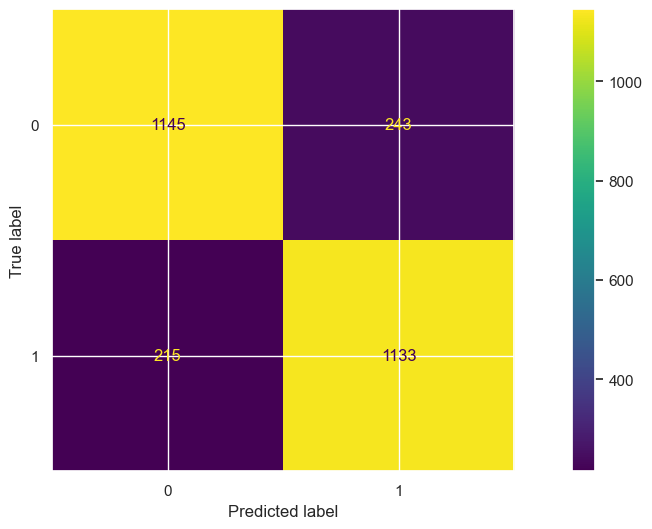

In [69]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [70]:
# Gradient Boost
gradientboost = GradientBoostingClassifier()
params = {
    "loss":["log_loss", "deviance", "exponential"],
    "learning_rate":[0.1,0.01,0.001,1],
    "criterion":["friedman_mse", "squared_error"],
    'max_depth': [8,10,15],
    'min_samples_split':[3,4,6],
    "min_samples_leaf":[2,3,4]
}

In [71]:
randomsearch =RandomizedSearchCV(gradientboost,params,cv=5)

In [72]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.01, 0.001, 1],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [8, 10, 15],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [3, 4, 6]})

In [73]:
randomsearch.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 15,
 'loss': 'log_loss',
 'learning_rate': 1,
 'criterion': 'friedman_mse'}

In [74]:
randomsearch.score(X_train,y_train)

1.0

In [75]:
y_predict = randomsearch.predict(X_test)

In [76]:
accuracy_score(y_test,y_predict)

0.8633040935672515

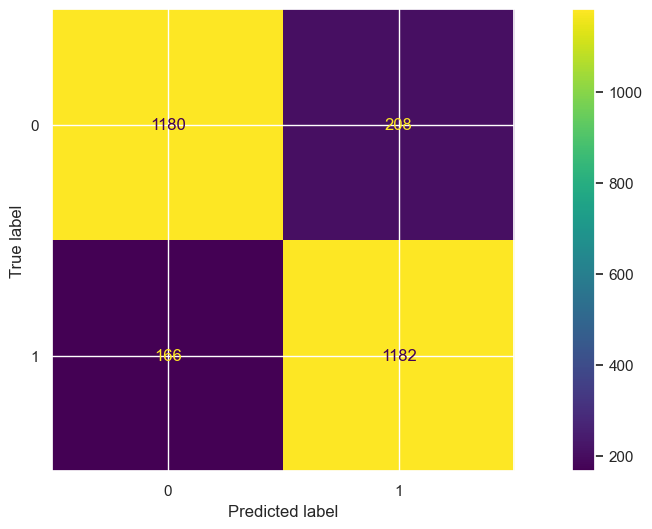

In [77]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [78]:
## SVM
svm = SVC()
params={
    "C":[1.0,0.1,10],
    "kernel":["rbf"],
}

In [79]:
randomsearch =RandomizedSearchCV(svm,params,cv=5)

In [80]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 0.1, 10], 'kernel': ['rbf']})

In [81]:
randomsearch.best_params_

{'kernel': 'rbf', 'C': 10}

In [82]:
randomsearch.score(X_train,y_train)

0.8519736842105263

In [83]:
y_predict = randomsearch.predict(X_test)

In [84]:
accuracy_score(y_test,y_predict)

0.8146929824561403

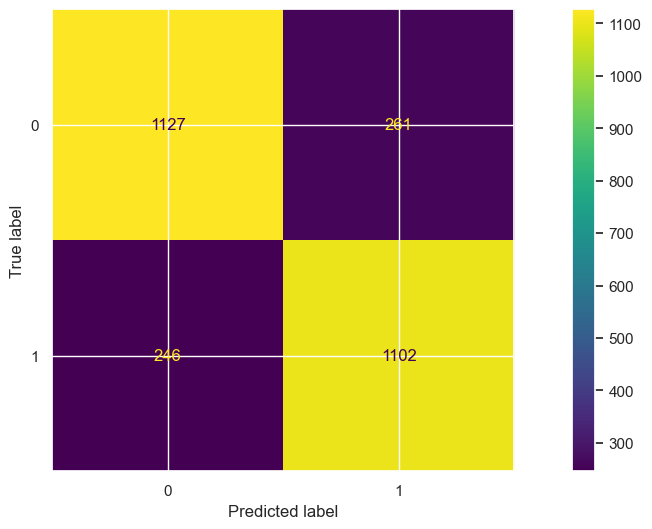

In [85]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [86]:
## BaggingClassifier
bagging = BaggingClassifier(svm,n_estimators=50)

In [87]:
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50)

In [88]:
bagging.score(X_train,y_train)

0.8370796783625731

In [89]:
y_predict = randomsearch.predict(X_test)

In [90]:
accuracy_score(y_test,y_predict)

0.8146929824561403

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1388
           1       0.81      0.82      0.81      1348

    accuracy                           0.81      2736
   macro avg       0.81      0.81      0.81      2736
weighted avg       0.81      0.81      0.81      2736



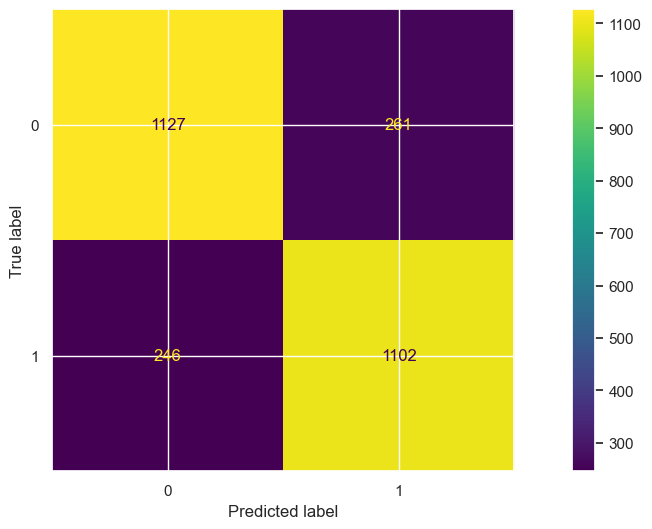

In [92]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [93]:
# XGBooster
xg = XGBClassifier(n_estimators=250,max_depth=12,max_leaves=4,learning_rate=0.01)

In [94]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
xg.score(X_train,y_train)

0.9565058479532164

In [96]:
y_predict = randomsearch.predict(X_test)

In [97]:
accuracy_score(y_test,y_predict)

0.8146929824561403

In [98]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1388
           1       0.81      0.82      0.81      1348

    accuracy                           0.81      2736
   macro avg       0.81      0.81      0.81      2736
weighted avg       0.81      0.81      0.81      2736



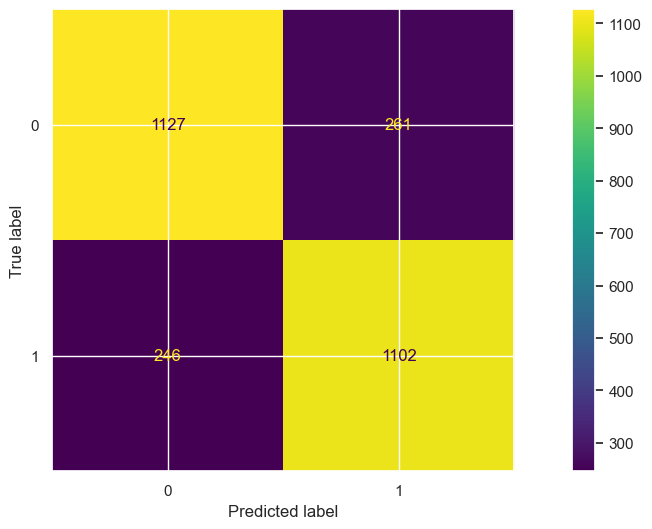

In [99]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [100]:
data

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1
